In [190]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

## Modeling prior predictive distribution

In [191]:
gen_quant = CmdStanModel(stan_file='/home/stan_model.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [192]:
samples = gen_quant.sample( fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [193]:
samples_df = samples.draws_pd()
samples_df

,lp__,accept_stat__,N,y,p
0,0.0,0.0,50.0,14.0,0.188434
1,0.0,0.0,50.0,7.0,0.201660
2,0.0,0.0,50.0,12.0,0.207091
3,0.0,0.0,50.0,11.0,0.206415
4,0.0,0.0,50.0,13.0,0.193982
...,...,...,...,...,...
995,0.0,0.0,50.0,14.0,0.225930
996,0.0,0.0,50.0,13.0,0.175942
997,0.0,0.0,50.0,7.0,0.195514
998,0.0,0.0,50.0,18.0,0.238076


Histograms of generated samples

[]

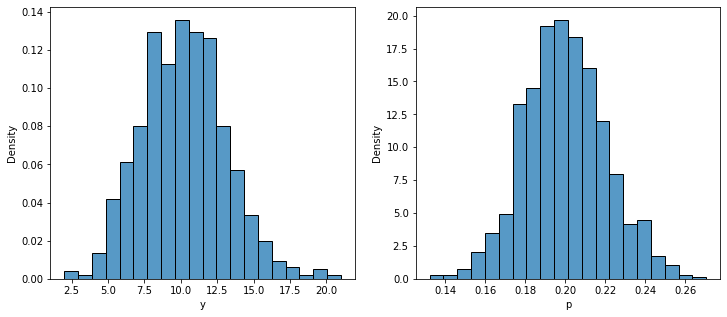

In [194]:
fig, axs = plt.subplots(1,2, figsize=(12,5))
sns.histplot(data=samples_df, x="y", bins=20, stat="density", ax=axs[0])
sns.histplot(data=samples_df, x="p", bins=20, stat="density", ax=axs[1])
plt.plot()

Ratio of allergic reactions for each sample

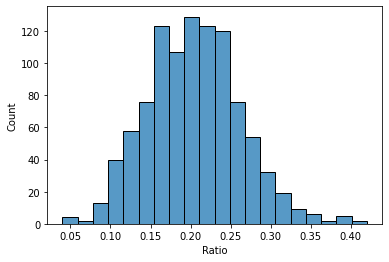

In [195]:
y = samples_df['y']
p = samples_df['p']
ratio = y/50
sns.histplot(data=ratio, bins=20)
plt.xlabel("Ratio")
plt.show()

In [196]:
print("Mean of the ratio: ", ratio.mean())

Mean of the ratio:  0.20290000000000002


## Modeling posterior and posterior predictive distribution

In [197]:
gen_quant = CmdStanModel(stan_file='/home/stan_model_2.stan')

INFO:cmdstanpy:compiling stan file /home/stan_model_2.stan to exe file /home/stan_model_2
INFO:cmdstanpy:compiled model executable: /home/stan_model_2


In [198]:
N = 50
y = 7
samples = gen_quant.sample( data={'N':N, 'y':y})

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed

INFO:cmdstanpy:CmdStan done processing.


In [199]:
samples_df = samples.draws_pd()
samples_df

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,p,y_pred
0,-22.6615,1.000000,0.877506,2.0,3.0,0.0,24.1790,0.192158,6.0
1,-22.6615,0.792570,0.877506,1.0,3.0,0.0,23.8596,0.192158,10.0
2,-23.0634,0.904671,0.877506,1.0,3.0,0.0,23.2615,0.211806,10.0
3,-23.1031,0.989710,0.877506,1.0,1.0,0.0,23.1948,0.212621,11.0
4,-23.2376,0.965055,0.877506,1.0,1.0,0.0,23.3212,0.215146,11.0
...,...,...,...,...,...,...,...,...,...
3995,-22.6710,1.000000,1.104520,1.0,1.0,0.0,22.7051,0.191021,7.0
3996,-23.1263,0.884171,1.104520,1.0,3.0,0.0,23.2772,0.213081,16.0
3997,-22.8190,1.000000,1.104520,2.0,3.0,0.0,23.0423,0.183685,12.0
3998,-22.6535,0.999615,1.104520,1.0,3.0,0.0,22.8081,0.194199,13.0


[]

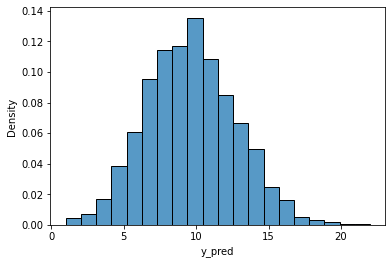

In [200]:
sns.histplot(data=samples_df, x="y_pred", bins=20, stat="density")
plt.plot()

Ratio of allergic reactions for each sample

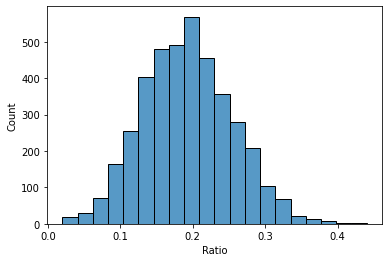

In [201]:
y = samples_df['y_pred']
p = samples_df['p']
ratio = y/N
sns.histplot(data=ratio, bins=20)
plt.xlabel("Ratio")
plt.show()

Computing the expected value and 94% density interval

In [202]:
az.summary(np.array(ratio), kind="all")

arviz - WARNING - Shape validation failed: input_shape: (1, 4000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,0.194,0.059,0.1,0.3,0.001,0.001,3669.0,3800.0,NaN


In [203]:
az.summary(samples, kind="all", round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.19,0.02,0.16,0.23,0.00,0.00,1403.92,1517.62,1.0
y_pred,9.72,2.96,5.00,15.00,0.05,0.03,3672.09,3815.07,1.0


In [205]:
p = samples_df['p']
print(az.hdi(np.array(p), hdi_porb=0.94))

[0.158558 0.229138]


In [206]:
print(az.hdi(np.array(ratio), hdi_porb=0.94))

[0.1 0.3]


The expected value of parameter p is equal 0.19. 
The 94% density interval of paramter p is [0.158558 0.229138]

The expected value of the predicted ratio is equal 7/50 = 0,194. 
The 94% density interval of the predicted ratio is [0.1 0.3]


In [213]:
lower_ratio = (np.array(ratio) < 0.2).sum()
print("Number of simulated ratios smaller than 20 %: ", lower_ratio)
prob = lower_ratio/len(ratio)
print("Probability that ratio is lower than the average probability from traditional vaccines is equal: ", prob)

Number of simulated ratios smaller than 20 %:  1910
Probability that ratio is lower than the average probability from traditional vaccines is equal:  0.4775
